In [ ]:
%pip install -r requirements.txt
%pip install seaborn


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Analiza tekstu

In [ ]:
from wordfreq import top_n_list, word_frequency
import json
import time
from pathlib import Path
import pandas as pd
import numpy as np
from wordfreq import top_n_list, word_frequency
from parser_html import ParserHTML
from controller import Controller
from table_generator import TableGenerator
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
languages = ['ru', 'fr', 'en']
number = 1000
def load_language_words(language, number):
    words = top_n_list(language, number)

    language_words_with_frequency = {
        word: word_frequency(word, language)
        for word in words
    }
    
    return language_words_with_frequency

top_words_per_language = {}
for lang in languages:
    top_words_per_language[lang] = load_language_words(lang, number)


In [15]:
top_words_per_language['en']

{'the': 0.0537,
 'to': 0.0269,
 'and': 0.0257,
 'of': 0.0251,
 'a': 0.0229,
 'in': 0.0186,
 'i': 0.0123,
 'is': 0.0117,
 'for': 0.0102,
 'that': 0.0102,
 'you': 0.00955,
 'it': 0.00891,
 'on': 0.00813,
 'with': 0.00708,
 'this': 0.00661,
 'was': 0.00661,
 'be': 0.00617,
 'as': 0.00589,
 'are': 0.0055,
 'have': 0.00513,
 'at': 0.00501,
 'he': 0.0049,
 'not': 0.0049,
 'by': 0.00457,
 'but': 0.00427,
 'from': 0.00427,
 'my': 0.00372,
 'or': 0.00347,
 'we': 0.00347,
 'an': 0.00339,
 'your': 0.00339,
 'all': 0.00331,
 'so': 0.00331,
 'his': 0.00324,
 'they': 0.00316,
 'me': 0.00302,
 'if': 0.00295,
 'one': 0.00295,
 'can': 0.00288,
 'will': 0.00282,
 'just': 0.00269,
 'like': 0.00257,
 'about': 0.00251,
 'up': 0.00245,
 'out': 0.0024,
 'what': 0.0024,
 'has': 0.00234,
 'when': 0.00234,
 'more': 0.00229,
 'do': 0.00224,
 'no': 0.00224,
 'were': 0.00219,
 'who': 0.00219,
 'had': 0.00214,
 "it's": 0.00214,
 'their': 0.00214,
 'there': 0.00204,
 'her': 0.002,
 'which': 0.002,
 'time': 0.00195,


In [4]:
def create_word_count_files():
    controler = Controller(ParserHTML("https://bulbapedia.bulbagarden.net/wiki/"))
    controler.count_words("Bulbasaur", prefix="bulbasaur-long", postfix="en")
    controler.count_words("Abc", prefix="abc-short", postfix="en")

create_word_count_files()

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Bulbasaur (Pokémon) - Bulbapedia, the community-driven Pokémon encyclopedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"b96246af8872ba3e340b3007","wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Bulbasaur_(Pokémon)","wgTitle":"Bulbasaur (Pokémon)","wgCurRevisionId":4481127,"wgRevisionId":4481127,"wgArticleId":1161,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pokémon","Generation I Pokémon","Grass-type Pokémon","Poison-type Pokémon","Dual-type Pokémon","Pokémon with a gender ratio of sev

In [6]:
def create_word_count_file_local(language:str):
    controler = Controller(ParserHTML(f"https://{language}.wikipedia.org/wiki/", use_local_html_file_instead=True), language=language)
    controler.count_words(f"math-{language}", prefix="math", postfix=language)

for land in languages:
    create_word_count_file_local(land)

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="ru">
<head>
<meta charset="utf-8"/>
<title>Математика — Википедия</title>
<script>(function(){var className="client-js";var cookie=document.cookie.match(/(?:^|; )ruwikimwclientpreferences=([^;]+)/);if(cookie){cookie[1].split('%2C').forEach(function(pref){className=className.replace(new RegExp('(^| )'+pref.replace(/-clientpref-\w+$|[^\w-]+/g,'')+'-clientpref-\\w+( |$)'),'$1'+pref+'$2');});}document.documentElement.className=className;}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgRequestId":"5cca2e5e-d14f-47fa-ad01-66bc75a940f4","wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Математика","wgTitle":"Математика","wgCurRevisionId":150448945,"wgRevisionId":150448945,"wg

In [55]:
k_values = [3, 10, 100, 1000]
prefix = "analysis-count-words-data"
files_map = {
    "bulbapedia-long": f"{prefix}/bulbasaur-long-en-word-counts.json",
    "bulbapedia-short": f"{prefix}/abc-short-en-word-counts.json",
    "ru-wiki": f"{prefix}/math-ru-word-counts.json",
    "en-wiki": f"{prefix}/math-en-wiki-word-counts.json",
    "fr-wiki": f"{prefix}/math-fr-wiki-word-counts.json"
}

def lang_confidence_score(word_counts, language_words):
    set_a = set(word_counts.keys())
    set_b = set(language_words.keys())
    
    intersection = len(set_a & set_b)
    union = len(set_a | set_b)
    
    return intersection / union if union != 0 else 0.0

def top_k_words(language, k):
    sorted_words = sorted(top_words_per_language[language].items(), key=lambda item: item[1], reverse=True)
    return dict(sorted_words[:k])

In [56]:
controler = Controller(ParserHTML(url="cos", use_local_html_file_instead=True))

def save_results(k_values, files_map, languages):
    result = []

    for k in k_values:
        top_k_words_by_lang = {
            lang: top_k_words(lang, k)
            for lang in languages
        }

        for name, counts_path in files_map.items():
            word_counts = controler.load_word_counts(counts_path)

            for lang, top_words in top_k_words_by_lang.items():
                confidence_score = lang_confidence_score(
                    word_counts=word_counts,
                    language_words=top_words
                )

                result.append({
                    "k": k,
                    "language": lang,
                    "file": name,
                    "confidence_score": confidence_score
                })

    return result


In [58]:
data = save_results(k_values, files_map, languages)
df = pd.DataFrame(data)
df.sort_values(by=["k", "confidence_score"], ascending=[True, False], inplace=True)
df

,k,language,file,confidence_score
5,3,en,bulbapedia-short,0.041667
2,3,en,bulbapedia-long,0.001774
6,3,ru,ru-wiki,0.001648
7,3,fr,ru-wiki,0.000549
0,3,ru,bulbapedia-long,0.000000
1,3,fr,bulbapedia-long,0.000000
3,3,ru,bulbapedia-short,0.000000
4,3,fr,bulbapedia-short,0.000000
8,3,en,ru-wiki,0.000000
9,3,ru,en-wiki,0.000000


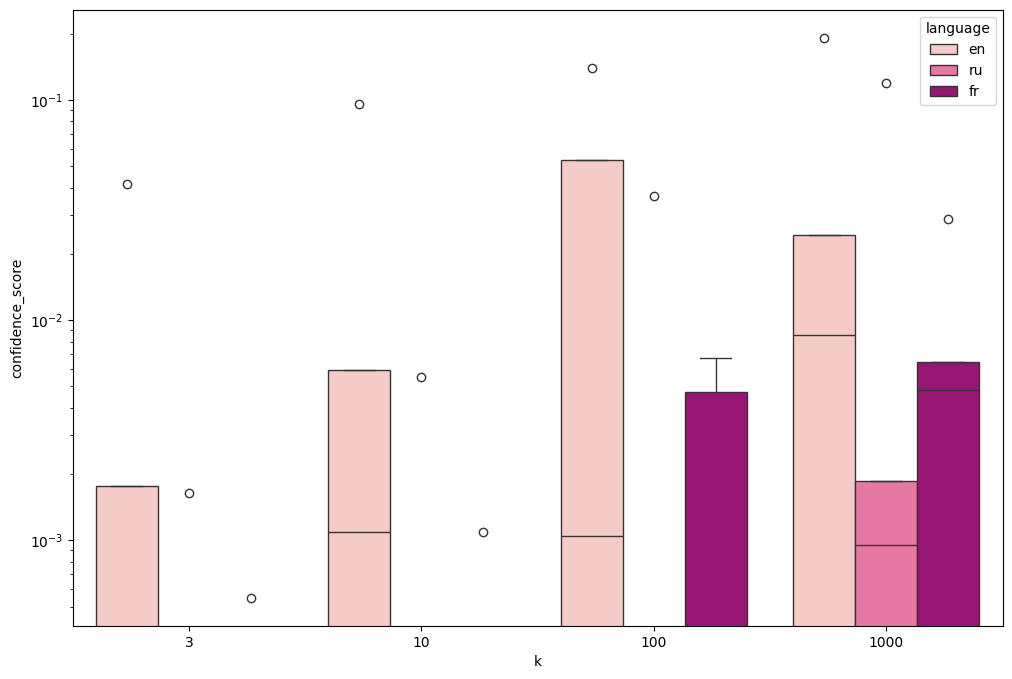

In [67]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='k', y='confidence_score', hue='language', palette='RdPu')
plt.yscale('log')
plt.show()

/Users/hanussiia/Desktop/mimuw/python/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/hanussiia/Desktop/mimuw/python/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/hanussiia/Desktop/mimuw/python/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/hanussiia/Desktop/mimuw/python/.venv/lib/python3

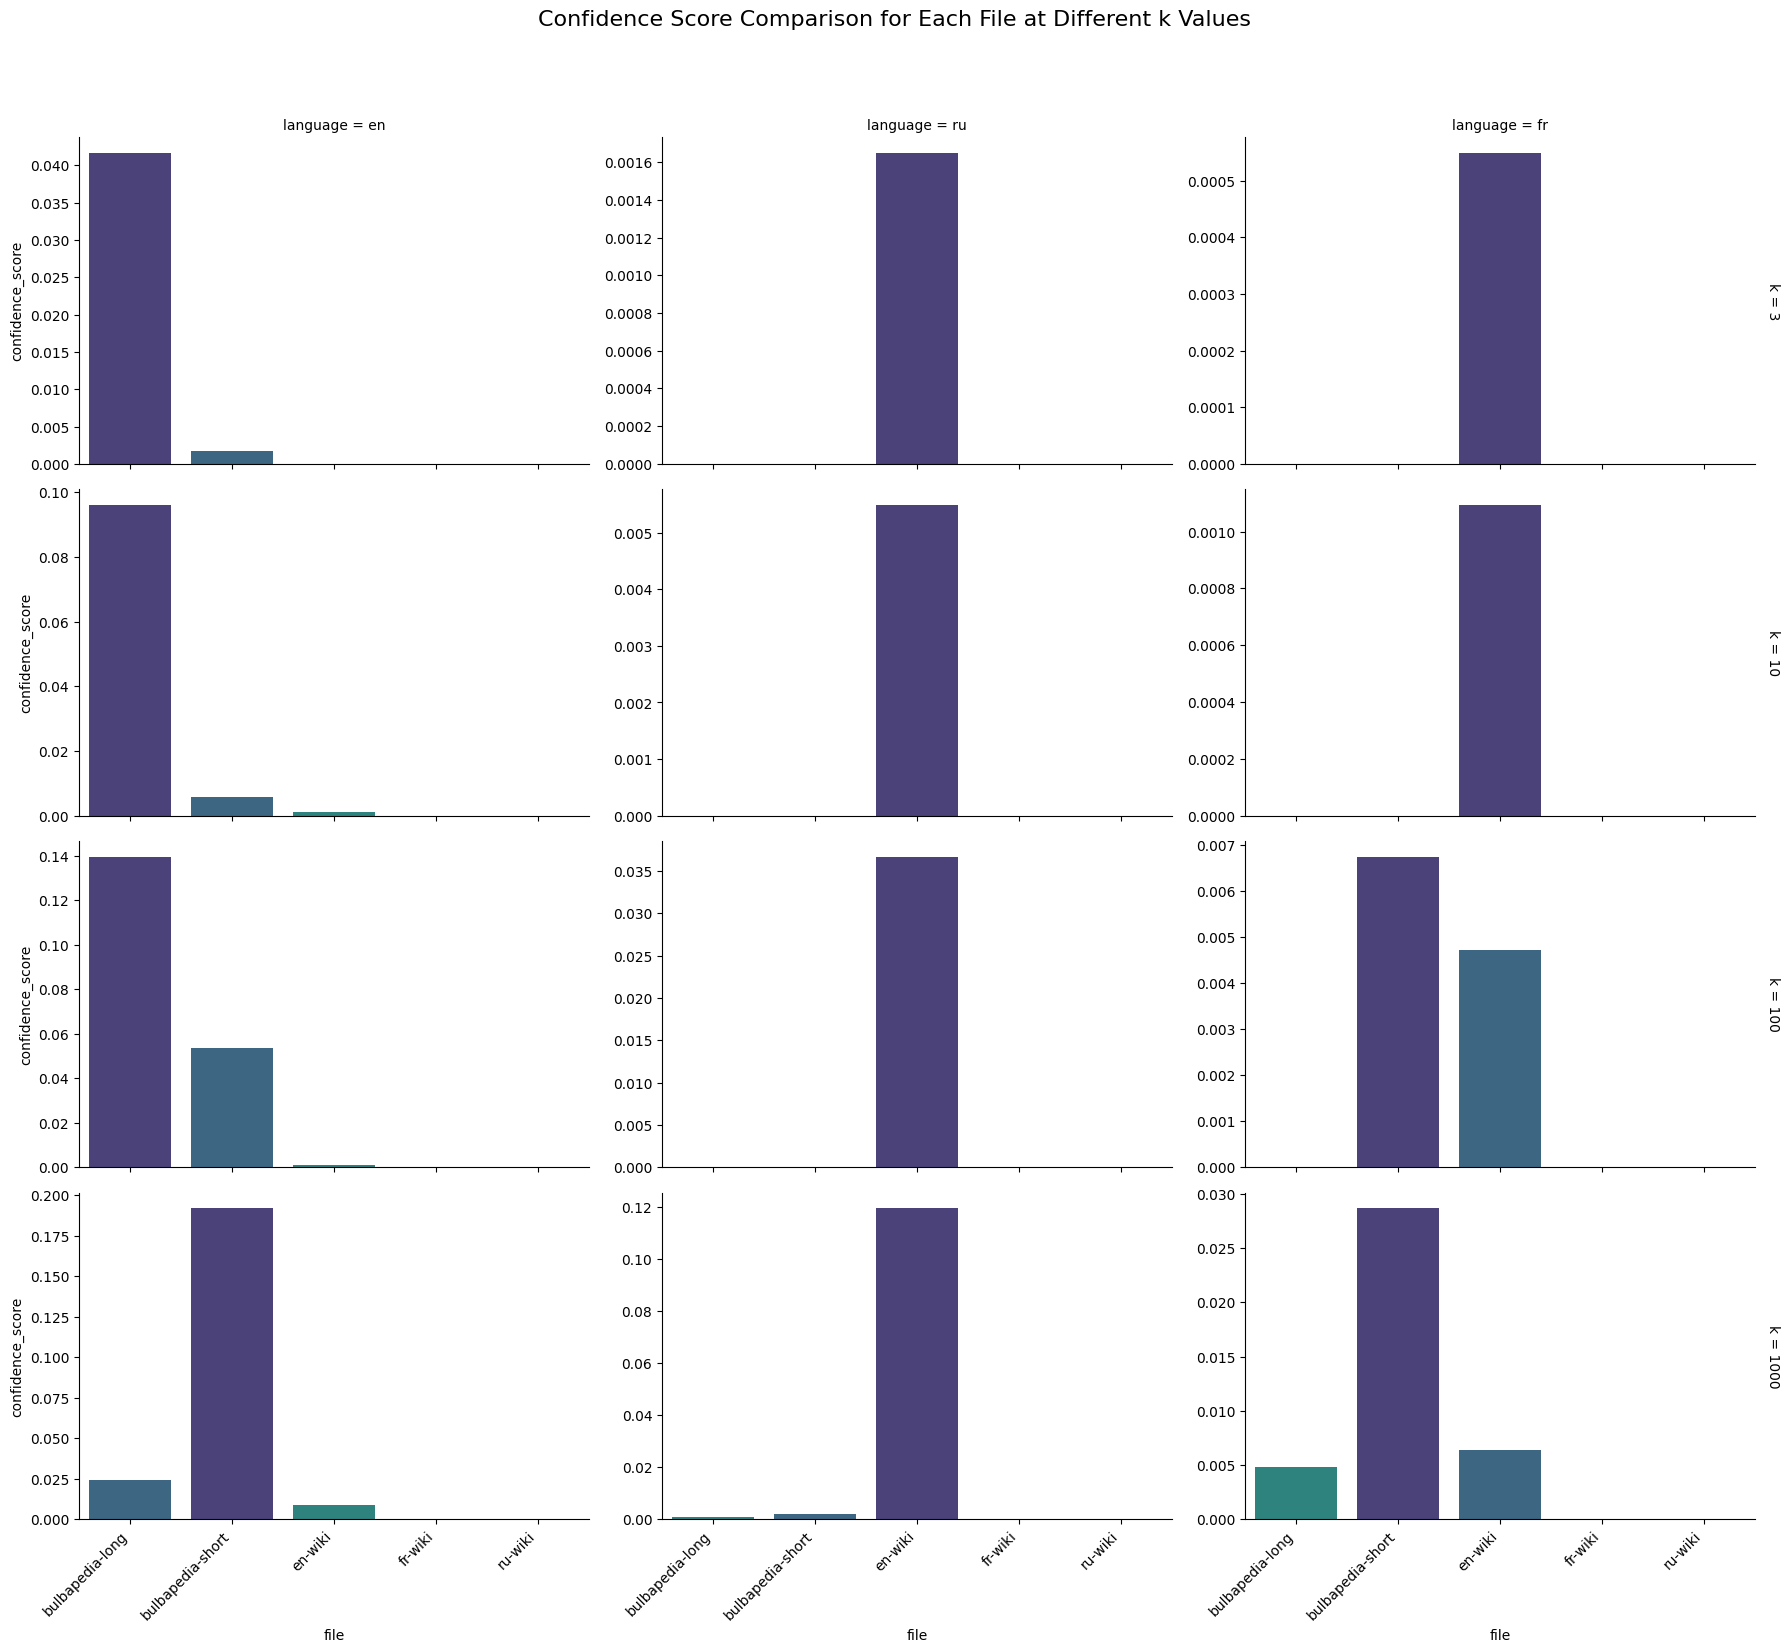

In [73]:
files_order = sorted(df['file'].unique())

g = sns.FacetGrid(df, col="language", row="k", margin_titles=True, sharey=False, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x="file", y="confidence_score", palette="viridis")

for ax in g.axes.flatten():
    ax.set_xticks(range(len(files_order)))
    ax.set_xticklabels(files_order, rotation=45, ha="right")

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Confidence Score Comparison for Each File at Different k Values', fontsize=16)

plt.show()

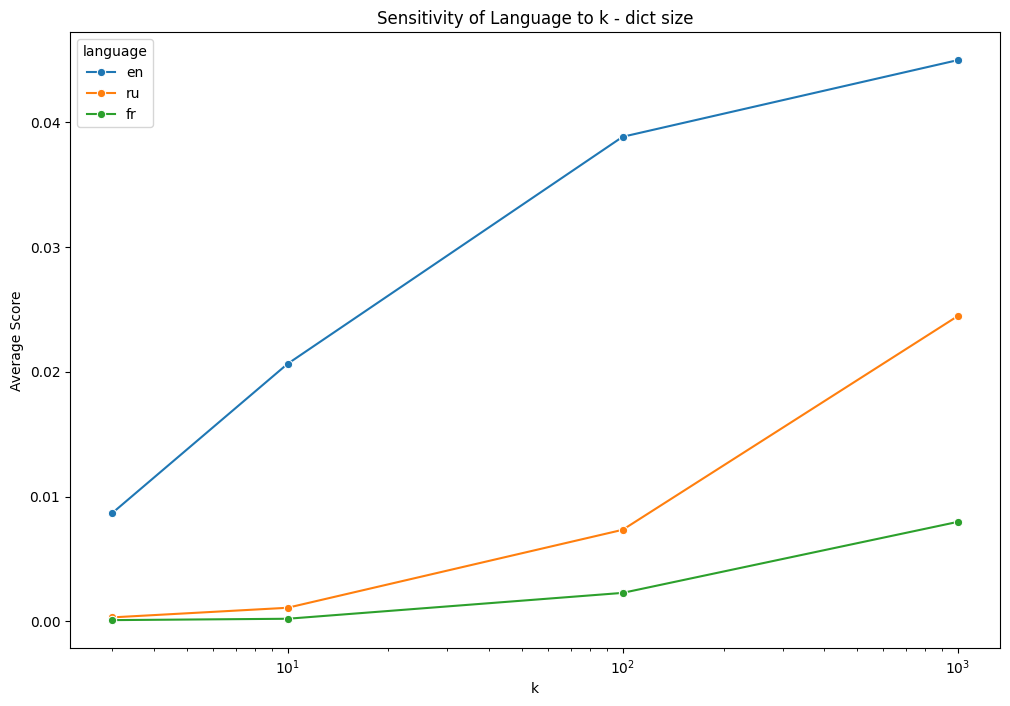

In [61]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='k', y='confidence_score', hue='language', marker='o', errorbar=None)
plt.xscale('log') 
plt.title('Sensitivity of Language to k - dict size')
plt.ylabel('Average Score')
plt.show()